Use of Force:
This Indicator measures the rate of use of force on subjects per 100,000 people in Oakland by race/ethnicity. Note: There were 10 incidents of use of force that were on a crowd. For these incidents, the number and race/ethnicity of subjects were not available. Therefore, each was counted as one incident in the Citywide total. This will somewhat undercount the true total of people subjected to use of force and will potentially misrepresent the true racial and ethnic breakdown as well.

In [ ]:
import pandas as pd
import geopandas as gp
import fiona
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pylab as pylab
from scipy import ndimage
import numpy as np
import seaborn as sns
import scipy
import six

In [258]:
df = pd.read_csv('Use_of_Force.csv')


In [259]:
df2 = df.drop([4])

In [260]:
df

,Race/Ethnicity,Number of use of force subjects,Population of Oakland,"Rate per 100,000 people in Oakland",Year
0,African American,237,96981,244.4,2017
1,Asian,10,67535,14.8,2017
2,Latino,77,109762,70.2,2017
3,White,12,116230,10.3,2017
4,Citywide,353,419987,84.1,2017


In [261]:
race2 = df2.pivot_table(values=['Number of use of force subjects','Population of Oakland'],index='Race/Ethnicity',)

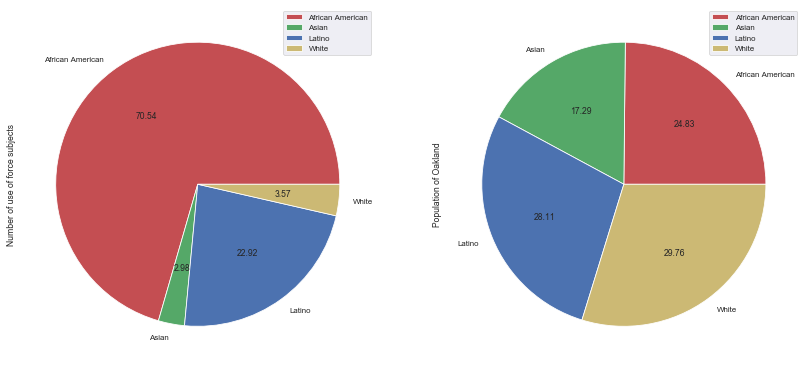

In [262]:
race2.plot.pie(subplots=True,figsize=(14,14),autopct='%.2f',colors='rgby')
plt.savefig('ufPie.png')

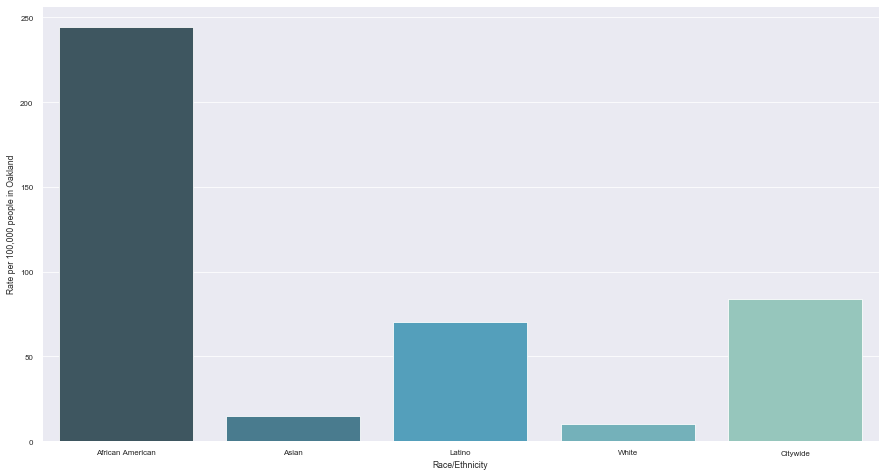

In [263]:
plt.figure(figsize=(15, 8)).tight_layout()
sns.set_context("paper", font_scale=0.9, rc={"lines.linewidth": 2.5})

sns.barplot(x='Race/Ethnicity',y='Rate per 100,000 people in Oakland',data=df,palette="GnBu_d")

plt.savefig('ufBar.png')

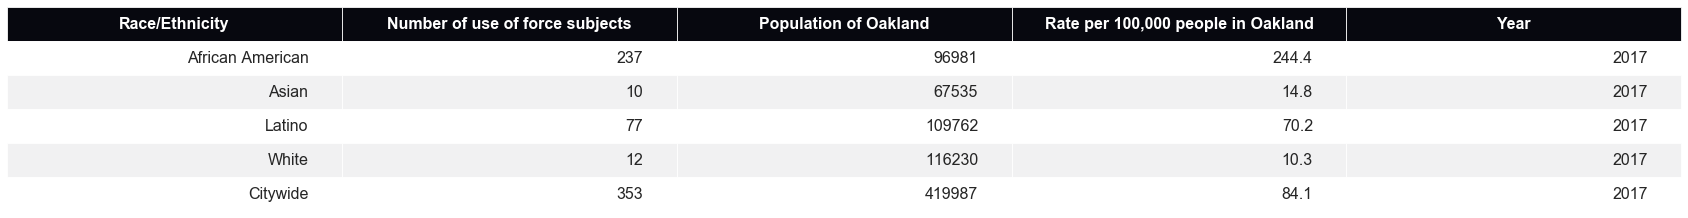

In [264]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#07080f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=6)
plt.savefig('ufChart.png')